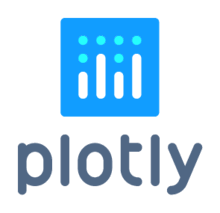

# Plotly: a brief tutorial

Plotly's Python graphing library makes interactive, publication-quality graphs online.

Notebook available at <br>
https://github.com/fdtomasi/plotly-tutorial

In [46]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Matplotlib
import matplotlib.pyplot as plt

# Plotly
import plotly.offline as py
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.io as pio

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

## Motivation
* Easy presentation of results
* Interactivity to understand data (patterns may be hidden)
* Build interactive charts for the web right from `pandas` dataframes

## What is `plotly`
`plotly` is a plotting library for interactive charts.
Usually, interactive charts require tweaking with javascript to produce nice plots, which is time-consuming and in most of the cases not (or not easily) reusable

## Advantages of `plotly`

* Indeed, visualisations are built with plotly.js ... but there is no need of js knowledge!
* Offers API for Python, R and many others -- easily integrable in data analysis pipelines
* Converts static plots into interactive in a <br><font color="green"><b>single line</b></font> of code: no time lost
* Plots for presentations in real time

## Very, very brief history
<blockquote>2012: plotly was founded<br>
2015 (Nov): plotly.js becomes open-source</blockquote>

## Quickstart

## or: how it is easy to convert static to interactive

Generate our first data set

In [2]:
x = np.linspace(np.pi, 3 * np.pi, 50)
sinx = np.sin(x)

To plot static charts in Python, we can use the main plotting library that is `matplotlib`

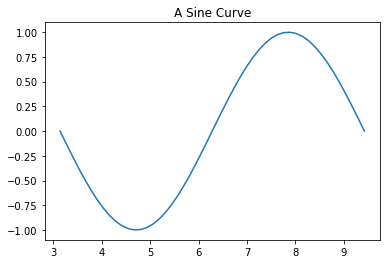

In [3]:
from matplotlib import pyplot as plt
f, ax = plt.subplots()
ax.plot(x, sinx) # marker='o'
ax.set_title('A Sine Curve'); #ax.set_ylim([0.5,-0.5]);

Our first approach to `plotly`: conversion from `matplotlib`

In [4]:
plotly_fig = tls.mpl_to_plotly(f)
py.iplot(plotly_fig, filename='sine-plot')

In [5]:
plotly_fig = tls.mpl_to_plotly(f)
py.iplot(plotly_fig, filename='sine-plot')

We can directly interact with the plot.
Options vary with the type of plot, general are "download as png", "edit in chart studio", "zoom", "pan", "compare data on hover", "rotation" (for 3D plots) and so on. 

## Using `plotly`
3 main concepts: Data, Layout, Figure

The <font color="red"><b>Data</b></font> object defines what we want to display in the chart. We define a collection of data and the specifications to display them as a trace. A Data object can have many traces. Think of a line chart with two lines representing two different categories: each line is a trace.

The <font color="blue"><b>Layout</b></font> object defines features that are not related to data (like title, axis titles, and so on). We can also use the Layout to add annotations and shapes to the chart.

The <font color="green"><b>Figure</b></font> object creates the final object to be plotted. It's an object that contains both data and layout.

We can plot single or multiple lines, as in `matplotlib`

In [61]:
trace = go.Scatter(
    x=[1, 2, 3],  # data on x-axis
    y=[4, 5, 6],  # data on y-axis
    mode="lines+markers")

data = [trace]
layout = go.Layout(title='test_1', width=800, height=200)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

## Loading Data

First, we load some data, that contain the number of citations and rank for each university per year.

In [7]:
# Load data that we will use.
timesData = pd.read_csv("input/timesData.csv")

In [8]:
timesData.head(5).iloc[:, :10]

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152"
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243"
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074"
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596"
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929"


## First example
We can plot the number of citations and teaching of the top 100 universities

In [62]:
df = timesData.iloc[:100, :]  # prepare data frame
# trace1: citations
trace1 = go.Scatter(x=df.world_rank, y=df.citations,
                    mode="lines", name="citations",
                    marker=dict(color='rgba(16, 112, 2, 0.8)'),
                    text=df.university_name)
# trace2: teaching
trace2 = go.Scatter(x=df.world_rank, y=df.teaching,
                    mode="lines+markers", name="teaching",
                    marker=dict(color='rgba(80, 26, 80, 0.8)'),
                    text=df.university_name)
layout = go.Layout(title='Citation and Teaching vs World Rank of Top 100 Universities',
                   xaxis=dict(title='World Rank', ticklen=5, zeroline=False))
fig = go.Figure(data=[trace1, trace2], layout=layout)
iplot(fig)

## Scatter
The same `Scatter` function has multiple uses based on the `mode` param.

In [10]:
# prepare data frames
df2014 = timesData[timesData.year == 2014].iloc[:100, :]
df2015 = timesData[timesData.year == 2015].iloc[:100, :]
df2016 = timesData[timesData.year == 2016].iloc[:100, :]

In [64]:
trace1 = go.Scatter(
    x=df2014.world_rank, y=df2014.citations,
    mode="markers+lines",  # this! or we can try "lines+markers"
    name="2014", marker=dict(color='rgba(255, 128, 255, 0.8)'), text=df2014.university_name)

trace2 = go.Scatter(
    x=df2015.world_rank, y=df2015.citations,
    mode="markers",  # this!
    name="2015", marker=dict(color='rgba(255, 128, 2, 0.8)'), text=df2015.university_name)

trace3 = go.Scatter(
    x=df2016.world_rank, y=df2016.citations,
    mode="markers",  # this!
    name="2016", marker=dict(color='rgba(0, 255, 200, 0.8)'), text=df2016.university_name)

layout = go.Layout(title='Citation vs world rank of top 100 universities with 2014, 2015 and 2016 years',
                   xaxis=dict(title='World Rank', ticklen=5, zeroline=False), yaxis=dict(title='Citation', ticklen=5, zeroline=False))

fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
iplot(fig)

Too messy? Try to hide some of the years

In [65]:
# creating trace1
trace1 = go.Scatter(
    x=df2014.world_rank, y=df2014.citations,
    mode="markers",  # this! or we can try "lines+markers"
    name="2014", marker=dict(color='rgba(255, 128, 255, 0.8)'), text=df2014.university_name)

# creating trace2
trace2 = go.Scatter(
    x=df2015.world_rank, y=df2015.citations,
    mode="markers",  # this!
    name="2015", marker=dict(color='rgba(255, 128, 2, 0.8)'), text=df2015.university_name)
# creating trace3
trace3 = go.Scatter(
    x=df2016.world_rank, y=df2016.citations,
    mode="markers",  # this!
    name="2016", marker=dict(color='rgba(0, 255, 200, 0.8)'), text=df2016.university_name)
layout = go.Layout(title='Citation vs world rank of top 100 universities with 2014, 2015 and 2016 years',
                   xaxis=dict(title='World Rank', ticklen=5, zeroline=False), yaxis=dict(title='Citation', ticklen=5, zeroline=False))
fig = go.Figure(data=[trace1, trace2, trace3], layout=layout)
iplot(fig)

Note that it is possible to omit the explicit `go.Scatter` class and use directly a dict for the data.
In the case where we don't need a particular layout, we can omit it altogether, plotting directly the data.

Let's see an example with bubble charts.

In [66]:
df2016 = timesData[timesData.year == 2016].iloc[:20, :]
num_students_size = [float(each.replace(',', '.'))
                     for each in df2016.num_students]
international_color = [float(each) for each in df2016.international]
iplot([{
        'y': df2016.teaching,
        'x': df2016.world_rank,
        'mode': 'markers',
        'marker': {
            'color': international_color,
            'size': num_students_size,
            'showscale': True
        }, "text":  df2016.university_name}])

Beside `Scatter`, `plotly` offers various ready-to-use objects, such as histograms, bars, box plots etc.

In [14]:
# bar, scatter and subplots
df2016 = timesData[timesData.year == 2016].iloc[:7, :]

y_saving = [each for each in df2016.research]
y_net_worth = [float(each) for each in df2016.income]
x_saving = [each for each in df2016.university_name]
x_net_worth = [each for each in df2016.university_name]

In [54]:
# ** hidden data preparation**
trace0 = go.Bar(
    x=y_saving, y=x_saving,
    marker=dict(color='rgba(171, 50, 96, 0.6)', line=dict(
        color='rgba(171, 50, 96, 1.0)', width=1)),
    name='research',
    orientation='h')
trace1 = go.Scatter(
    x=y_net_worth, y=x_net_worth,
    mode='lines+markers',
    line=dict(color='rgb(63, 72, 204)'),
    name='income')

In [53]:
layout = go.Layout(
    title='Citations and income',
    yaxis=dict(showticklabels=True, domain=[0, 0.85]),
    yaxis2=dict(showline=True, showticklabels=False,
                linecolor='rgba(102, 102, 102, 0.8)', linewidth=2, domain=[0, 0.85]),
    xaxis=dict(zeroline=False, showline=False, showticklabels=True,
               showgrid=True, domain=[0, 0.42]),
    xaxis2=dict(zeroline=False, showline=False, showticklabels=True,
                showgrid=True, domain=[0.47, 1], side='top', dtick=25),
    legend=dict(x=0.029, y=1.038, font=dict(size=10)),
    margin=dict(l=200, r=20, t=70, b=70),
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
)

annotations = []
y_s = np.round(y_saving, decimals=2)
y_nw = np.rint(y_net_worth)
# Adding labels
for ydn, yd, xd in zip(y_nw, y_s, x_saving):
    # labeling the scatter savings
    annotations.append(dict(xref='x2', yref='y2', y=xd, x=ydn - 4, text='{:,}'.format(
        ydn), font=dict(family='Arial', size=12, color='rgb(63, 72, 204)'), showarrow=False))
    # labeling the bar net worth
    annotations.append(dict(xref='x1', yref='y1', y=xd, x=yd + 3, text=str(yd),
                            font=dict(family='Arial', size=12, color='rgb(171, 50, 96)'), showarrow=False))

layout['annotations'] = annotations

In [34]:
# ** hidden annotations
# Creating two subplots
fig = tls.make_subplots(
    rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
    shared_yaxes=False, vertical_spacing=0.001)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig['layout'].update(layout)
iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [55]:
# bar, scatter and subplots
df2016 = timesData[timesData.year == 2016].iloc[:7, :]

y_saving = [each for each in df2016.research]
y_net_worth = [float(each) for each in df2016.income]
x_saving = [each for each in df2016.university_name]
x_net_worth = [each for each in df2016.university_name]
trace0 = go.Bar(
    x=y_saving,
    y=x_saving,
    marker=dict(color='rgba(171, 50, 96, 0.6)', line=dict(
        color='rgba(171, 50, 96, 1.0)', width=1)),
    name='research',
    orientation='h',
)
trace1 = go.Scatter(
    x=y_net_worth,
    y=x_net_worth,
    mode='lines+markers',
    line=dict(color='rgb(63, 72, 204)'),
    name='income',
)
layout = go.Layout(
    title='Citations and income',
    yaxis=dict(showticklabels=True, domain=[0, 0.85]),
    yaxis2=dict(showline=True, showticklabels=False,
                linecolor='rgba(102, 102, 102, 0.8)', linewidth=2, domain=[0, 0.85]),
    xaxis=dict(zeroline=False, showline=False, showticklabels=True,
               showgrid=True, domain=[0, 0.42]),
    xaxis2=dict(zeroline=False, showline=False, showticklabels=True,
                showgrid=True, domain=[0.47, 1], side='top', dtick=25),
    legend=dict(x=0.029, y=1.038, font=dict(size=10)),
    margin=dict(l=200, r=20, t=70, b=70),
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
)
annotations = []
y_s = np.round(y_saving, decimals=2)
y_nw = np.rint(y_net_worth)
# Adding labels
for ydn, yd, xd in zip(y_nw, y_s, x_saving):
    # labeling the scatter savings
    annotations.append(dict(xref='x2', yref='y2', y=xd, x=ydn - 4, text='{:,}'.format(
        ydn), font=dict(family='Arial', size=12, color='rgb(63, 72, 204)'), showarrow=False))
    # labeling the bar net worth
    annotations.append(dict(xref='x1', yref='y1', y=xd, x=yd + 3, text=str(yd),
                            font=dict(family='Arial', size=12, color='rgb(171, 50, 96)'), showarrow=False))

layout['annotations'] = annotations

# Creating two subplots
fig = tls.make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                        shared_yaxes=False, vertical_spacing=0.001)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig['layout'].update(layout)
iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



Note that the subplots are independent!

In [19]:
x2011 = timesData.student_staff_ratio[timesData.year == 2011]
x2012 = timesData.student_staff_ratio[timesData.year == 2012]

In [56]:
# Histograms
trace1 = go.Histogram(
    x=x2011, opacity=0.75, name="2011", marker=dict(color='rgba(171, 50, 96, 0.6)'))
trace2 = go.Histogram(
    x=x2012, opacity=0.75, name="2012", marker=dict(color='rgba(12, 50, 196, 0.6)'))
layout = go.Layout(barmode='overlay',
                   title='students-staff ratio in 2011 and 2012',
                   xaxis=dict(title='students-staff ratio'),
                   yaxis=dict(title='Count'))
iplot(go.Figure(data=[trace1, trace2], layout=layout))

In [21]:
# data preparation
x2015 = timesData[timesData.year == 2015]

In [57]:
# box plot
trace0 = go.Box(
    y=x2015.total_score,
    name='total score of universities in 2015',
    marker=dict(color='rgb(12, 12, 140)')
)
trace1 = go.Box(
    y=x2015.research,
    name='research of universities in 2015',
    marker=dict(color='rgb(12, 128, 128)')
)
iplot([trace0, trace1])

## More complex charts
`plotly` includes useful functions for more complicated plots.
Let's see an example with a scatter plot, where the diagonal has box plots

In [23]:
import plotly.figure_factory as ff
dataframe = timesData[timesData.year == 2015]
data2015 = dataframe.loc[:, ["research", "international", "total_score"]]
data2015["index"] = np.arange(1, len(data2015)+1)

In [58]:
iplot(ff.create_scatterplotmatrix(
    data2015, diag='box', index='index', colormap='Portland',
    colormap_type='cat', height=700, width=700))

## 3D Scatter Plot with Colorscaling
3D plots help data exploration. Interactive plots may also explored in presentations!

In [25]:
# create trace 1 that is 3d scatter
trace1 = go.Scatter3d(
    x=timesData.world_rank,
    y=timesData.research,
    z=timesData.citations,
    mode='markers',
    marker=dict(
        size=timesData.citations.values.astype(float)*0.1,
        color=timesData.citations.values.astype(float),
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8))
fig = go.Figure(data=[trace1], layout=go.Layout(
    margin=dict(l=0, r=0,  b=0,  t=0)))
iplot(fig)

In [67]:
# create trace 1 that is 3d scatter
trace1 = go.Scatter3d(
    x=timesData.world_rank,
    y=timesData.research,
    z=timesData.citations,
    mode='markers',
    marker=dict(
        size=timesData.citations.values.astype(float)*0.1,
        color=timesData.citations.values.astype(float),
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8))
fig = go.Figure(data=[trace1], layout=go.Layout(
    margin=dict(l=0, r=0,  b=0,  t=0)))
iplot(fig)

Even if plots are in 3D, a particular point of view may condition the interpretation. Instead, interactivity is not limited to the particular point of view chosen a priori

## Dash
https://dash-drug-explorer.plot.ly/

<blockquote>
“Dash is a Python framework for building analytical web applications. No JavaScript required. Dash is ideal for building data visualization apps with highly custom user interfaces in pure Python. It’s particularly suited for anyone who works with data in Python.” — Plotly’s site
</blockquote>

## Conclusion
* Interactivity for a better understanding of results
* Clean presentations
* API for common scripting languages + Web interface